# Chocolate Bar Ratings
### (continue from Part 1)

### 3.3 NN Model

In [371]:
def make_model(
    input_shape,
    n_classes=1,
    layer_size=32,
    dropout_rate=0.0,
    n_layers=1,
    regularization=None,
    batch_norm=True,
):
    layers = [tf.keras.layers.InputLayer(input_shape=input_shape)]
    for _ in range(n_layers):
        if batch_norm:
            layers += [tf.keras.layers.BatchNormalization()]
        layers += [
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(
                layer_size,
                kernel_initializer="he_uniform",
                kernel_regularizer=regularization
                and tf.keras.regularizers.l1_l2(*regularization),
            ),
            tf.keras.layers.LeakyReLU(),
        ]
    layers += [tf.keras.layers.Dense(n_classes)]
    return tf.keras.Sequential(layers)

In [381]:
def plot_history(history, contains, skip=0):
    df = pd.DataFrame(history.history)
    df[list(df.filter(regex=contains))].iloc[skip:].plot()

#### 3.3.1 NN Model - basic

In [372]:
nnr_model_1 = make_model(
    train_data.values.shape[1:],
    layer_size=32,
    dropout_rate=0.0,
    regularization=None,
    n_layers=3,
)

In [373]:
nnr_model_1.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),
    loss=tf.keras.losses.mean_squared_error,
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(),
    ]
)

In [374]:
nnr_model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_17 (Batc (None, 9)                 36        
_________________________________________________________________
dropout_17 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                320       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 32)                128       
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)               

In [375]:
nnr_model_1_history = nnr_model_1.fit(
    x=train_data.values,
    y=train_labels.values,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    verbose=0,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'nnr_model_1.h5'), save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=5),
        tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
        tf.keras.callbacks.TensorBoard(log_dir=str(TEMP_DIR/'nnr_model_1_logs')),
    ],
)

In [376]:
nnr_model_1.evaluate(train_data, train_labels)

1549/1549 [==============================] - 0s 99us/sample - loss: 0.1741 - root_mean_squared_error: 0.4172


[0.17405892602661643, 0.4172037]

In [388]:
nnr_model_1.evaluate(test_data, test_labels)

388/388 [==============================] - 0s 292us/sample - loss: 0.2258 - root_mean_squared_error: 0.4752


[0.22580046997856848, 0.47518465]

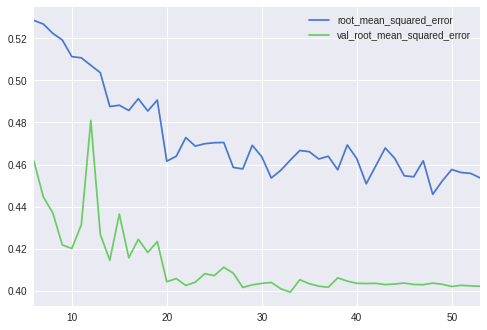

In [389]:
plot_history(nnr_model_1_history, 'root_mean_squared_error', skip=6)

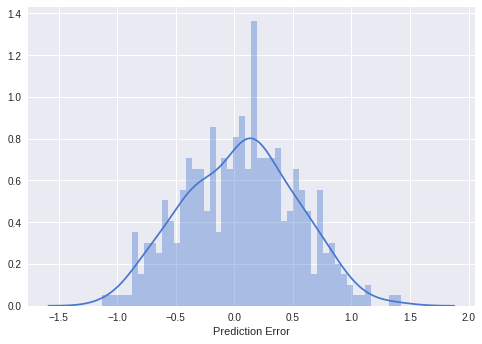

In [402]:
test_predictions_1 = nnr_model_1.predict(test_data).flatten()

sns.distplot(
    (test_predictions_1-test_labels),
    bins=50,
    axlabel="Prediction Error"
);

In [499]:
test_metrics.loc['NN_1', 'RMSE'] = np.sqrt(mean_squared_error(test_labels, test_predictions_1))

#### 3.3.2 NN Model - adding dropout and regularization

In [378]:
nnr_model_2 = make_model(
    train_data.values.shape[1:],
    layer_size=32,
    dropout_rate=0.1,
    regularization=(1e-8, 1e-4),
    n_layers=3,
)

In [379]:
nnr_model_2.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),
    loss=tf.keras.losses.mean_squared_error,
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(),
    ]
)

In [380]:
nnr_model_2_history = nnr_model_2.fit(
    x=train_data.values,
    y=train_labels.values,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    verbose=0,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'nnr_model_2.h5'), save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=5),
        tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
        tf.keras.callbacks.TensorBoard(log_dir=str(TEMP_DIR/'nnr_model_2_logs')),
    ],
)

In [383]:
nnr_model_2.evaluate(train_data, train_labels)

1549/1549 [==============================] - 0s 129us/sample - loss: 0.2150 - root_mean_squared_error: 0.4436


[0.21498642548235714, 0.443643]

In [385]:
nnr_model_2.evaluate(test_data, test_labels)

388/388 [==============================] - 0s 344us/sample - loss: 0.2336 - root_mean_squared_error: 0.4641


[0.23356476011349983, 0.46410927]

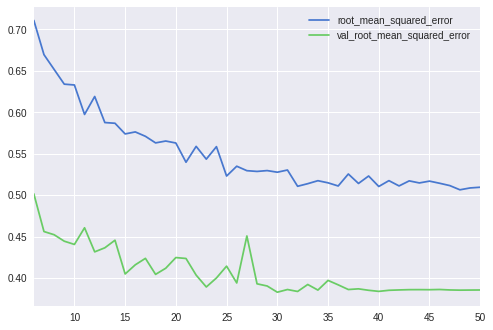

In [386]:
plot_history(nnr_model_2_history, 'root_mean_squared_error', skip=6)

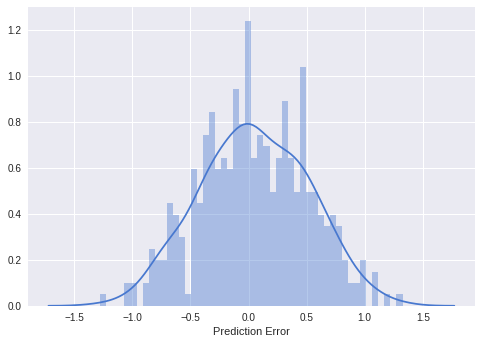

In [405]:
test_predictions_2 = nnr_model_2.predict(test_data).flatten()

sns.distplot(
    (test_predictions_2-test_labels),
    bins=50,
    axlabel="Prediction Error"
);

In [502]:
test_metrics.loc['NN_2', 'RMSE'] = np.sqrt(mean_squared_error(test_labels, test_predictions_2))

#### 3.3.3 NN Model - only adding regularization

In [390]:
nnr_model_3 = make_model(
    train_data.values.shape[1:],
    layer_size=32,
    dropout_rate=0.0,
    regularization=(1e-8, 1e-4),
    n_layers=3,
)

In [391]:
nnr_model_3.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),
    loss=tf.keras.losses.mean_squared_error,
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(),
    ]
)

In [392]:
nnr_model_3_history = nnr_model_3.fit(
    x=train_data.values,
    y=train_labels.values,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    verbose=0,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'nnr_model_3.h5'), save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=5),
        tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
        tf.keras.callbacks.TensorBoard(log_dir=str(TEMP_DIR/'nnr_model_3_logs')),
    ],
)


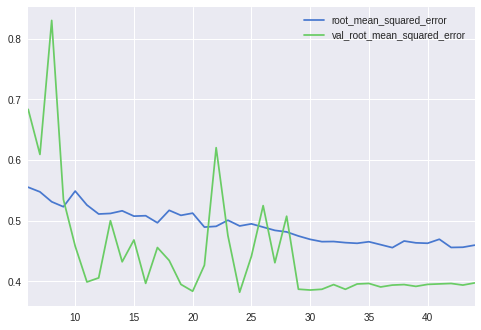

In [395]:
plot_history(nnr_model_3_history, 'root_mean_squared_error', skip=6)

In [393]:
nnr_model_3.evaluate(train_data, train_labels)

1549/1549 [==============================] - 0s 124us/sample - loss: 0.2019 - root_mean_squared_error: 0.4275


[0.2019224754739685, 0.4274505]

In [394]:
nnr_model_3.evaluate(test_data, test_labels)

388/388 [==============================] - 0s 294us/sample - loss: 0.2192 - root_mean_squared_error: 0.4473


[0.2192495822829684, 0.44725952]

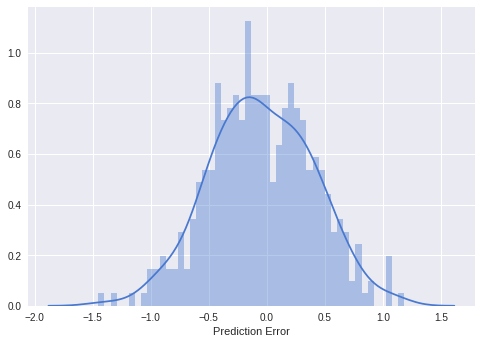

In [404]:
test_predictions_3 = nnr_model_3.predict(test_data).flatten()

sns.distplot(
    (test_predictions_3-test_labels),
    bins=50,
    axlabel="Prediction Error"
);

In [503]:
test_metrics.loc['NN_3', 'RMSE'] = np.sqrt(mean_squared_error(test_labels, test_predictions_3))

#### 3.3.4 NN Model - increasinf number of layer size and adding dropout rate`

In [396]:
nnr_model_4 = make_model(
    train_data.values.shape[1:],
    layer_size=64,
    dropout_rate=0.1,
    regularization=None,
    n_layers=3,
)

In [397]:
nnr_model_4.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),
    loss=tf.keras.losses.mean_squared_error,
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(),
    ]
)

In [398]:
nnr_model_4_history = nnr_model_4.fit(
    x=train_data.values,
    y=train_labels.values,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    verbose=0,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'nnr_model_4.h5'), save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=5),
        tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
        tf.keras.callbacks.TensorBoard(log_dir=str(TEMP_DIR/'nnr_model_4_logs')),
    ],
)


In [399]:
nnr_model_4.evaluate(train_data, train_labels)

1549/1549 [==============================] - 0s 109us/sample - loss: 0.1906 - root_mean_squared_error: 0.4365


[0.1905563097709298, 0.43652758]

In [400]:
nnr_model_4.evaluate(test_data, test_labels)

388/388 [==============================] - 0s 298us/sample - loss: 0.1991 - root_mean_squared_error: 0.4462


[0.19906744529906006, 0.44616973]

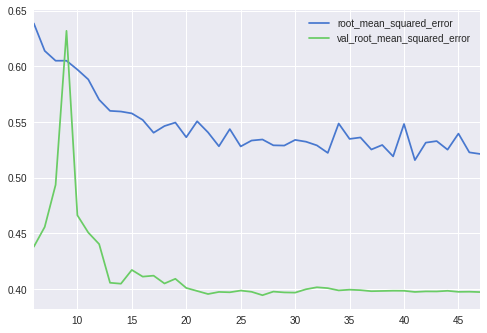

In [401]:
plot_history(nnr_model_4_history, 'root_mean_squared_error', skip=6)

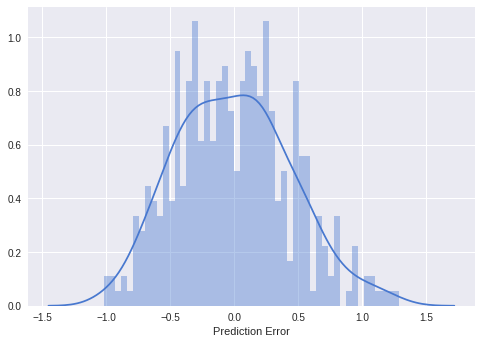

In [406]:
test_predictions_4 = nnr_model_4.predict(test_data).flatten()

sns.distplot(
    (test_predictions_4-test_labels),
    bins=50,
    axlabel="Prediction Error"
);

In [504]:
test_metrics.loc['NN_4', 'RMSE'] = np.sqrt(mean_squared_error(test_labels, test_predictions_4))

### 3.4 NN Model using embedings

In [407]:
def make_embedding_model(
    cat_feature_dims,
    n_cont_features,
    n_classes=1,
    layer_size=32,
    dropout_rate=0.0,
    regularization=None,
    n_layers=1,
    batch_norm=True,
):

    inputs = []
    embeddings = []
    for cat_feature_dim in cat_feature_dims.values():
        x = tf.keras.layers.Input(shape=(1,))
        inputs.append(x)
        x = tf.keras.layers.Embedding(
            cat_feature_dim, np.sqrt(cat_feature_dim).astype(int) + 1, input_length=1
        )(x)
        x = tf.keras.layers.Flatten()(x)
        embeddings.append(x)

    cont_inputs = tf.keras.layers.Input(shape=(n_cont_features,))
    inputs.append(cont_inputs)
    embeddings.append(cont_inputs)

    x = tf.keras.layers.Concatenate()(embeddings)

    for _ in range(n_layers):
        if batch_norm:
            x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        x = tf.keras.layers.Dense(
            layer_size,
            kernel_initializer="he_uniform",
            kernel_regularizer=regularization and tf.keras.regularizers.l1_l2(*regularization),
        )(x)
        x = tf.keras.layers.LeakyReLU()(x)

    x = tf.keras.layers.Dense(n_classes)(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

In [426]:
embedding_model = make_embedding_model(
    cat_feature_dims,
    len(cont_cols),
    n_classes=1,
    layer_size=64,
    dropout_rate=0.0,
    regularization=None,
    n_layers=3,
)

In [427]:
embedding_model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),
    loss=tf.keras.losses.mean_squared_error,
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(),
    ]
)

In [428]:
emb_train_data = [train_data[x] for x in train_data[cat_cols]] + [train_data[cont_cols]]

In [429]:
embedding_model_history = embedding_model.fit(
    emb_train_data,
    train_labels,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    verbose=0,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'embedding_model.h5'), save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=5),
        tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
        tf.keras.callbacks.TensorBoard(log_dir=str(TEMP_DIR/'embedding_model_logs')),
    ]
)

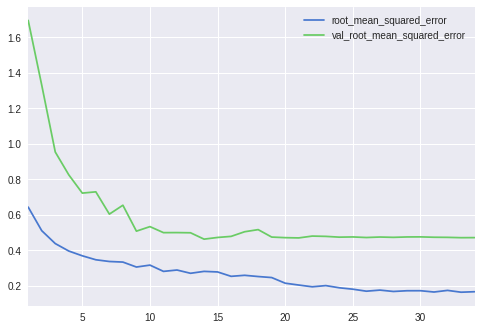

In [430]:
plot_history(embedding_model_history, 'root_mean_squared_error', skip=1)

In [431]:
emb_test_data = [test_data[x] for x in test_data[cat_cols]] + [test_data[cont_cols]]

In [432]:
embedding_model.evaluate(emb_train_data, train_labels)

1549/1549 [==============================] - 0s 123us/sample - loss: 0.0998 - root_mean_squared_error: 0.3160


[0.09983951329049794, 0.31597394]

In [433]:
embedding_model.evaluate(emb_test_data, test_labels)

388/388 [==============================] - 0s 380us/sample - loss: 0.2282 - root_mean_squared_error: 0.4777


[0.22818070619376665, 0.47768265]

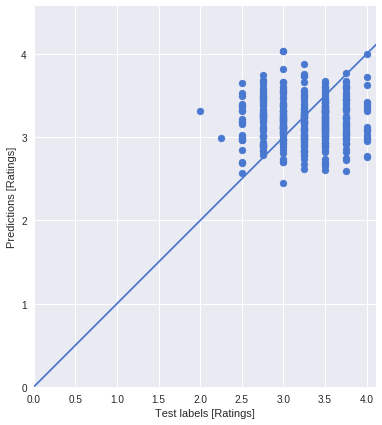

In [434]:
test_predictions_emb = embedding_model.predict(emb_test_data).flatten()

plt.figure(figsize=(7,7));
plt.scatter(test_labels, test_predictions_emb)
plt.xlabel('Test labels [Ratings]')
plt.ylabel('Predictions [Ratings]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100]);

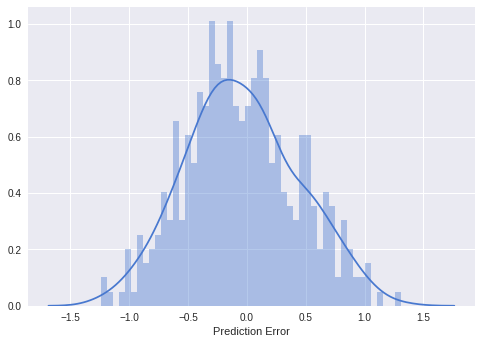

In [435]:
test_predictions_emb = embedding_model.predict(emb_test_data).flatten()

sns.distplot(
    (test_predictions_emb-test_labels),
    bins=50,
    axlabel="Prediction Error"
);

In [505]:
test_metrics.loc['NN_Emb', 'RMSE'] = np.sqrt(mean_squared_error(test_labels, test_predictions_emb))

### 3.3.5 NN Model - using HP tuning

In [454]:
def make_opt_model(
    layer_size,
    n_layers,
    input_shape,
    optimizer=keras.optimizers.Adam,
    lr=1e-3,
    dropout=0,
    l1_reg=0,
    l2_reg=0,
):
    for i in range(n_layers):
        layers = []
        layers += [
            keras.layers.BatchNormalization() if i else keras.layers.BatchNormalization(input_shape=input_shape),
            keras.layers.Dense(
                layer_size,
                activation=tf.nn.leaky_relu,
                kernel_initializer="he_uniform",
                kernel_regularizer=keras.regularizers.l1_l2(l1_reg, l2_reg),
            ),
            keras.layers.Dropout(dropout),
        ]
    layers += [keras.layers.Dense(1)]
    model = keras.Sequential(layers)
    model.compile(
        optimizer=optimizer(lr=lr),
        loss=tf.keras.losses.mean_squared_error,
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )
    return model


In [455]:
default_parameters = [16, 1, keras.optimizers.RMSprop, 1e-5, 0., 1e-8, 1e-8, 2]

In [464]:
dimensions = [
    skopt.space.Integer(low=16, high=512, name='layer_size'),
    skopt.space.Integer(low=1, high=5, name='n_layers'),
    skopt.space.Categorical([
         keras.optimizers.Adam,
         keras.optimizers.Nadam,
        keras.optimizers.RMSprop,
    ], name='optimizer'),
    skopt.space.Real(low=1e-5, high=1e-3, prior='log-uniform', name='lr'),
    skopt.space.Real(low=0., high=0.5, name='dropout'),
    skopt.space.Real(low=1e-8, high=1e-2, prior='log-uniform', name='l1_reg'),
    skopt.space.Real(low=1e-8, high=1e-2, prior='log-uniform', name='l2_reg'),
    skopt.space.Integer(low=2, high=20, name='patience'),
]

In [465]:
best_rmse = 3
best_model_arch_path = str(TEMP_DIR/'best_model.json')
best_model_weights_path = str(TEMP_DIR/'best_model.h5')

In [466]:
input_shape = train_data.shape[1:]

@skopt.utils.use_named_args(dimensions=dimensions)
def fitness(
    layer_size,
    n_layers,
    optimizer,
    lr,
    dropout,
    l1_reg,
    l2_reg,
    patience,
):
    model = make_opt_model(
        layer_size,
        n_layers,
        input_shape,
        optimizer,
        lr,
        dropout,
        l1_reg,
        l2_reg,
    )

    history = model.fit(
        x=train_data.values,
        y=train_labels.values,
        validation_split=0.2,
        epochs=300,
        verbose=0,
        batch_size=32,
        callbacks=[
            keras.callbacks.EarlyStopping(patience=patience * 3, restore_best_weights=True),
            keras.callbacks.ReduceLROnPlateau(patience=patience),
        ],   
    )

    rmse = min(history.history['root_mean_squared_error'])

    print("RMSE: {0}\n".format(rmse))
    global best_rmse

    if rmse < best_rmse:
        print('Best model'.center(80, '-'))
        print("RMSE: {0}".format(rmse))
        print(
            layer_size,
            n_layers,
            optimizer,
            lr,
            dropout,
            l1_reg,
            l2_reg,
            patience,
        )
        model.save_weights(best_model_weights_path)
        with open(best_model_arch_path, "w") as f:
            f.write(model.to_json())
        best_rmse = rmse

    del model

    keras.backend.clear_session()

    return -rmse

In [468]:
search_result = skopt.gp_minimize(
    func=fitness,
    dimensions=dimensions,
    acq_func='EI',
    n_calls=20,     
    x0=default_parameters,
)

RMSE: 1.3451412916183472

-----------------------------------Best model-----------------------------------
RMSE: 1.3451412916183472
16 1 <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'> 1e-05 0.0 1e-08 1e-08 2
RMSE: 1.1731436252593994

-----------------------------------Best model-----------------------------------
RMSE: 1.1731436252593994
60 1 <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'> 1.679202143534387e-05 0.20636780504988128 0.0016166113413366029 2.4483265660940128e-05 15
RMSE: 0.4892241954803467

-----------------------------------Best model-----------------------------------
RMSE: 0.4892241954803467
335 2 <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'> 0.000363672532744999 0.3529242637589894 3.4448704554025887e-06 8.235957785323996e-05 18
RMSE: 0.6158593893051147

RMSE: 1.1366634368896484

RMSE: 0.8139725923538208

RMSE: 0.4733690619468689

-----------------------------------Best model-----------------------------------
RMSE: 0.473369061946

In [469]:
with open(best_model_arch_path, 'r') as f:
    model = keras.models.model_from_json(f.read(), custom_objects={'leaky_relu': tf.nn.leaky_relu})

In [470]:
model.load_weights(best_model_weights_path)

In [475]:
test_predictions_model = model.predict(test_data.values)

In [478]:
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, test_predictions_model)))

Test RMSE: 0.40146835532970016


In [506]:
test_metrics.loc['NN_Tuned', 'RMSE'] = np.sqrt(metrics.mean_squared_error(test_labels, test_predictions_model))

## 4. Summary

In [507]:
test_metrics

,RMSE
RandomForest RS,0.401507
RandomForest GS,0.399885
NN_1,0.475185
NN_2,0.464109
NN_3,0.44726
NN_4,0.44617
NN_Emb,0.477683
NN_Tuned,0.401468
